### Introduction
What we gonna do here:
1. See how many resumes in total we have
2. Determine what are the categories
3. Compare the categories

In [10]:
frame <- read.csv("./data/Resume.csv")

In [11]:
names(frame) # let's see what information about resume is available

[1] "ID"          "Resume_str"  "Resume_html" "Category"

In [12]:
nrow(frame) # how many resumes in total we have

[1] 2484

In [13]:
categories <- unique(frame$Category)
categories # all the categories

[1] "HR"                     "DESIGNER"               "INFORMATION-TECHNOLOGY"
 [4] "TEACHER"                "ADVOCATE"               "BUSINESS-DEVELOPMENT"  
 [7] "HEALTHCARE"             "FITNESS"                "AGRICULTURE"           
[10] "BPO"                    "SALES"                  "CONSULTANT"            
[13] "DIGITAL-MEDIA"          "AUTOMOBILE"             "CHEF"                  
[16] "FINANCE"                "APPAREL"                "ENGINEERING"           
[19] "ACCOUNTANT"             "CONSTRUCTION"           "PUBLIC-RELATIONS"      
[22] "BANKING"                "ARTS"                   "AVIATION"

In [14]:
get.amount.by.each.category <- function(frame) {
  categories <- unique(frame$Category)
  amounts <- sapply(categories, function(category) {
    mask <- frame$Category == category
    sum(as.integer(mask))
  })
  frame <- data.frame(Category = categories, Amount = amounts)
  return(frame)
}

In [15]:
statistics.per.category <- get.amount.by.each.category(frame)
statistics.per.category

,Category,Amount
,<chr>,<int>
HR,HR,110
DESIGNER,DESIGNER,107
INFORMATION-TECHNOLOGY,INFORMATION-TECHNOLOGY,120
TEACHER,TEACHER,102
ADVOCATE,ADVOCATE,118
BUSINESS-DEVELOPMENT,BUSINESS-DEVELOPMENT,120
HEALTHCARE,HEALTHCARE,115
FITNESS,FITNESS,117
AGRICULTURE,AGRICULTURE,63


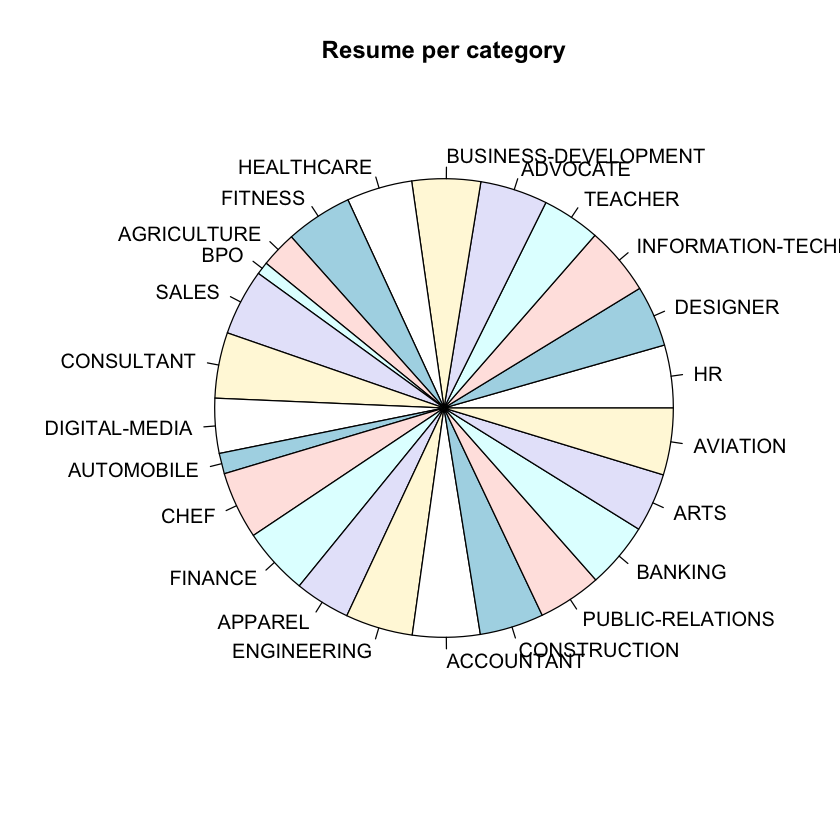

In [16]:
par(bg = "white")
pie(
  statistics.per.category$Amount, 
  labels = statistics.per.category$Category, 
  main = "Resume per category"
)

### Comparison and analysis
Things I wanna accomplish:
1. Compare resume length by different categories
2. See what are the most popular words by category

### A. Comparing categories by mean and median resume length

In [46]:
get.sizes.of.category <- function(frame, category) {
  resumes <- frame[frame$Category == category, "Resume_str"]
  sizes <- sapply(resumes, function(resume) {
    char <- as.character(resume)
    return(nchar(char))
  })
  vec <- unlist(sizes)
  names(vec) <- NULL
  return(vec)
}

In [108]:
library(repr)

plot.length.distribution <- function(frame, layout.size = c(2, 4)) {
  options(repr.plot.height = layout.size[1] * 5, repr.plot.width = layout.size[2] * 5)
  par(bg = "white", mfrow = layout.size)
  categories <- unique(frame$Category)
  colors <- c("#824d4d", "#82794d", "#58824d", "#4d827d", "#4d5582", "#804d82")
  for (category in categories) {
    lens <- get.sizes.of.category(frame, category)
    hist(lens, main = category, xlab = "Resume length", col = colors)
  }
}

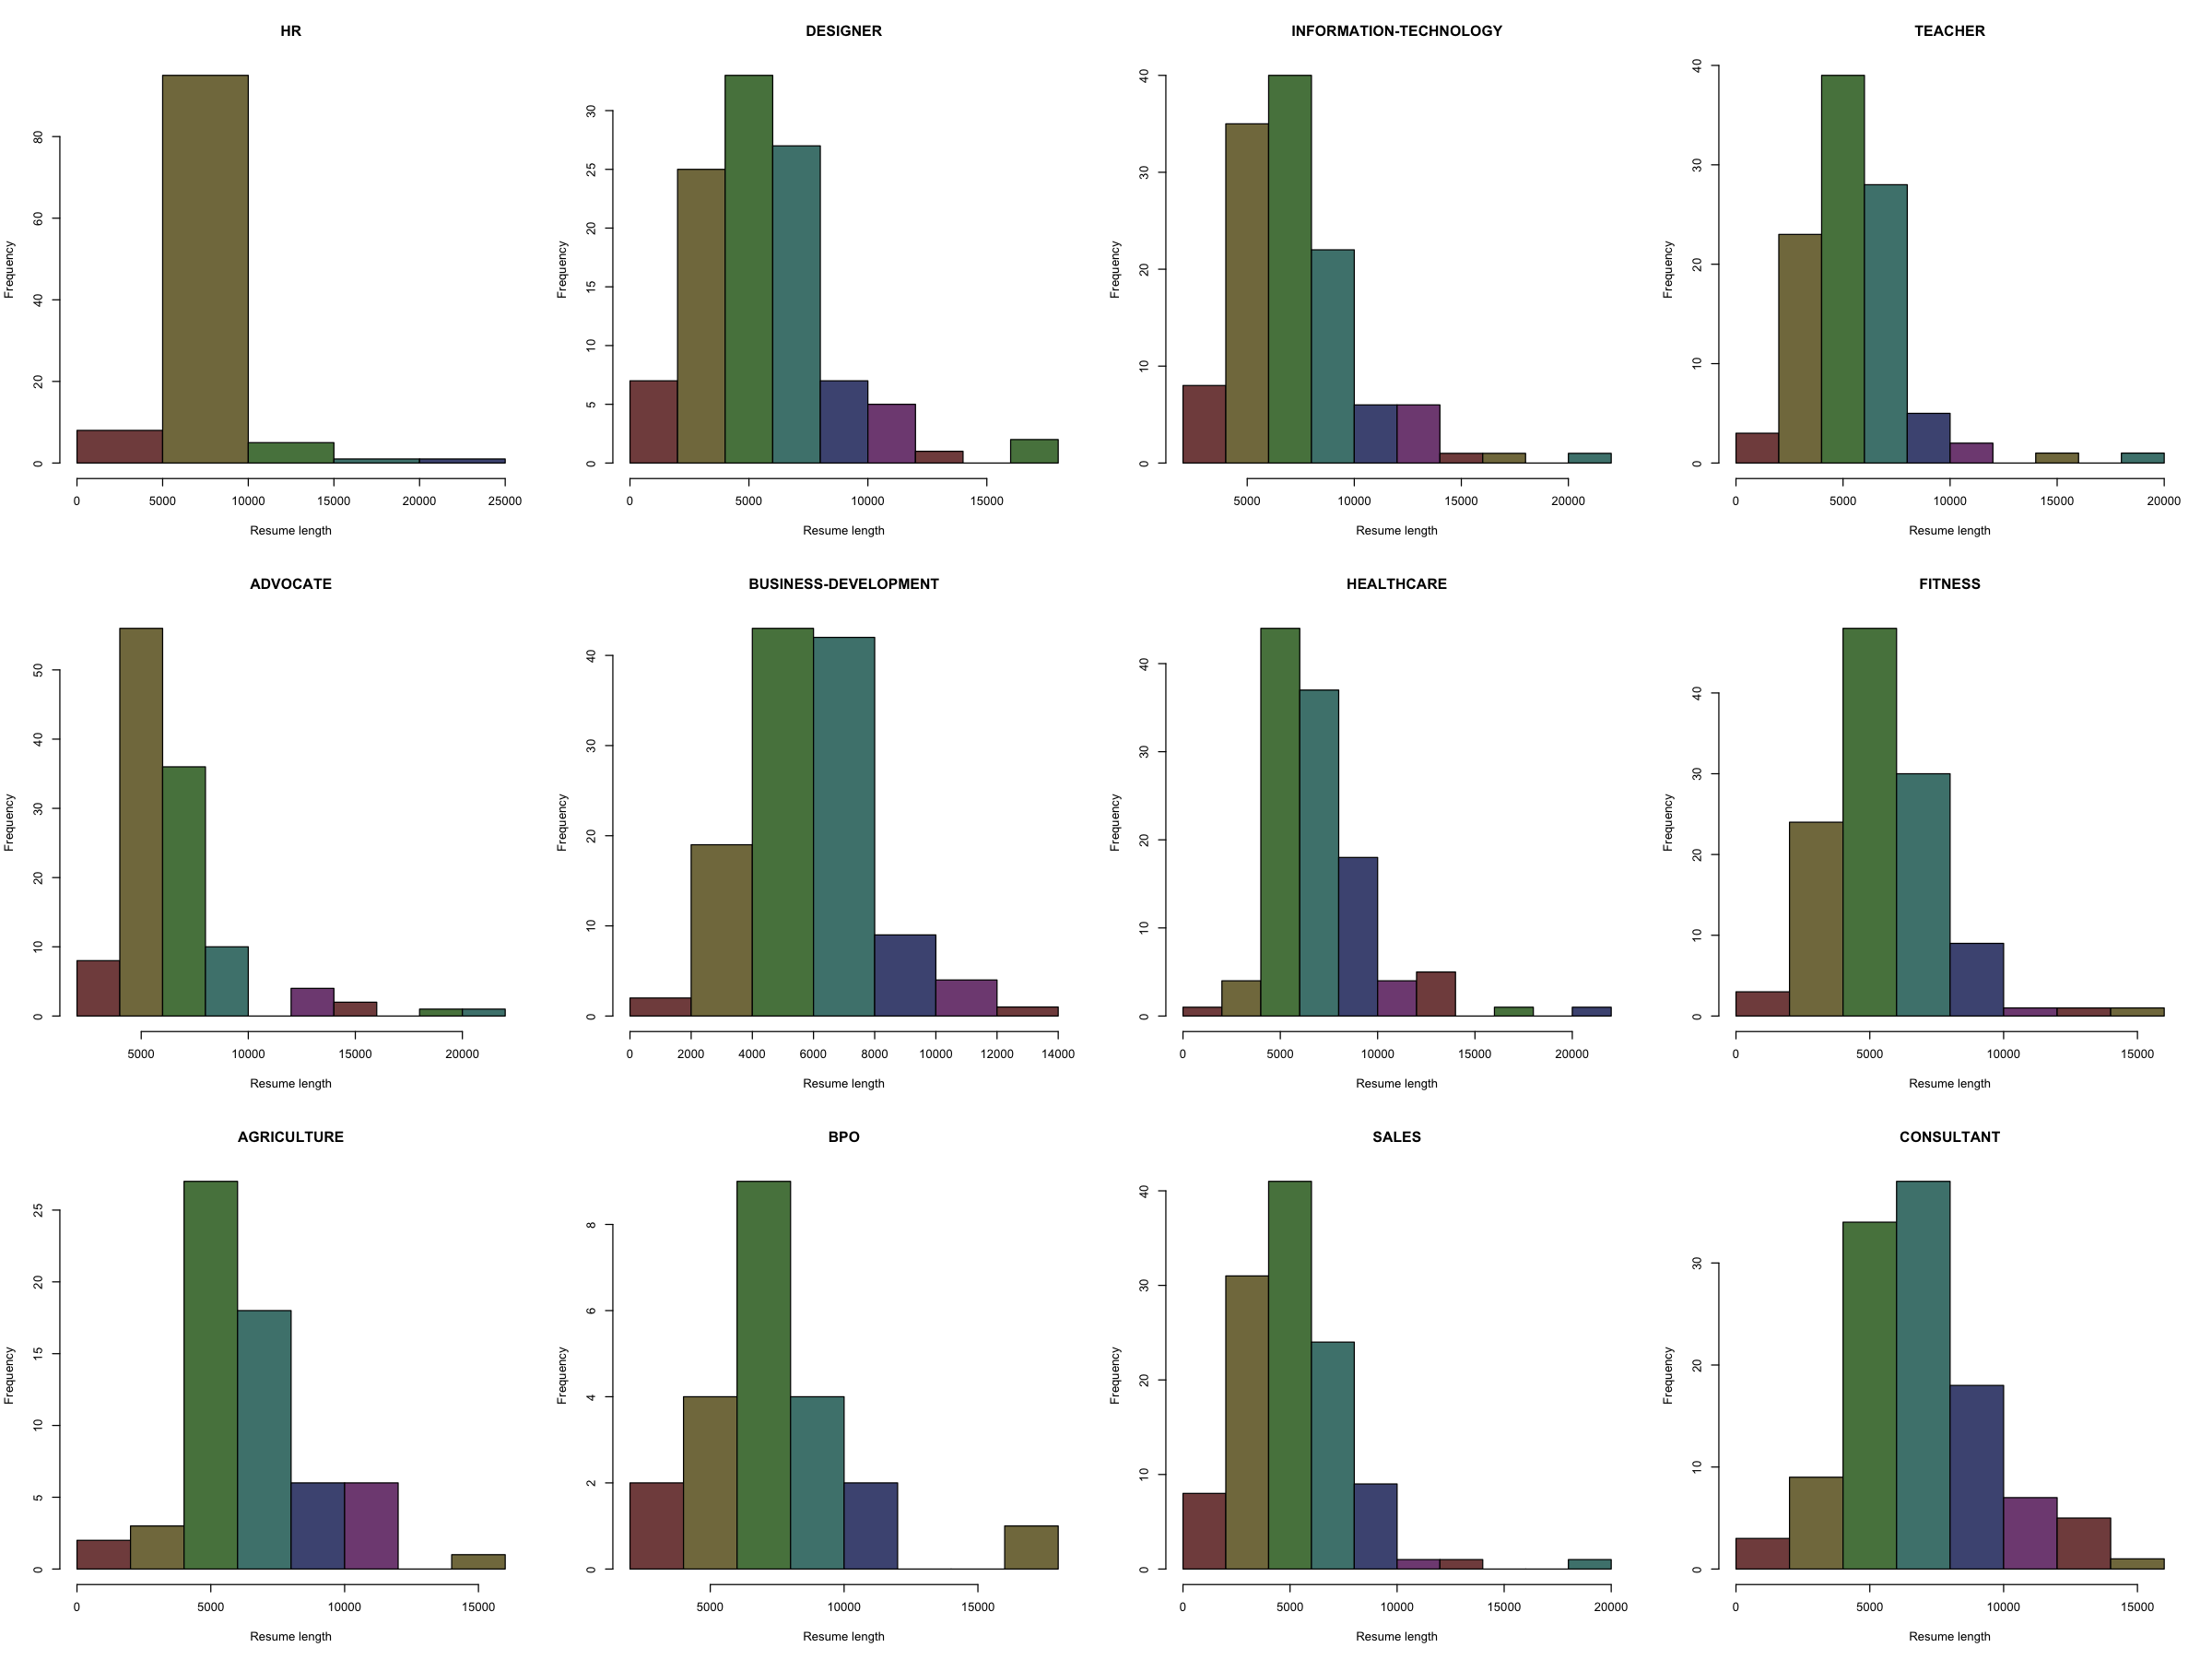

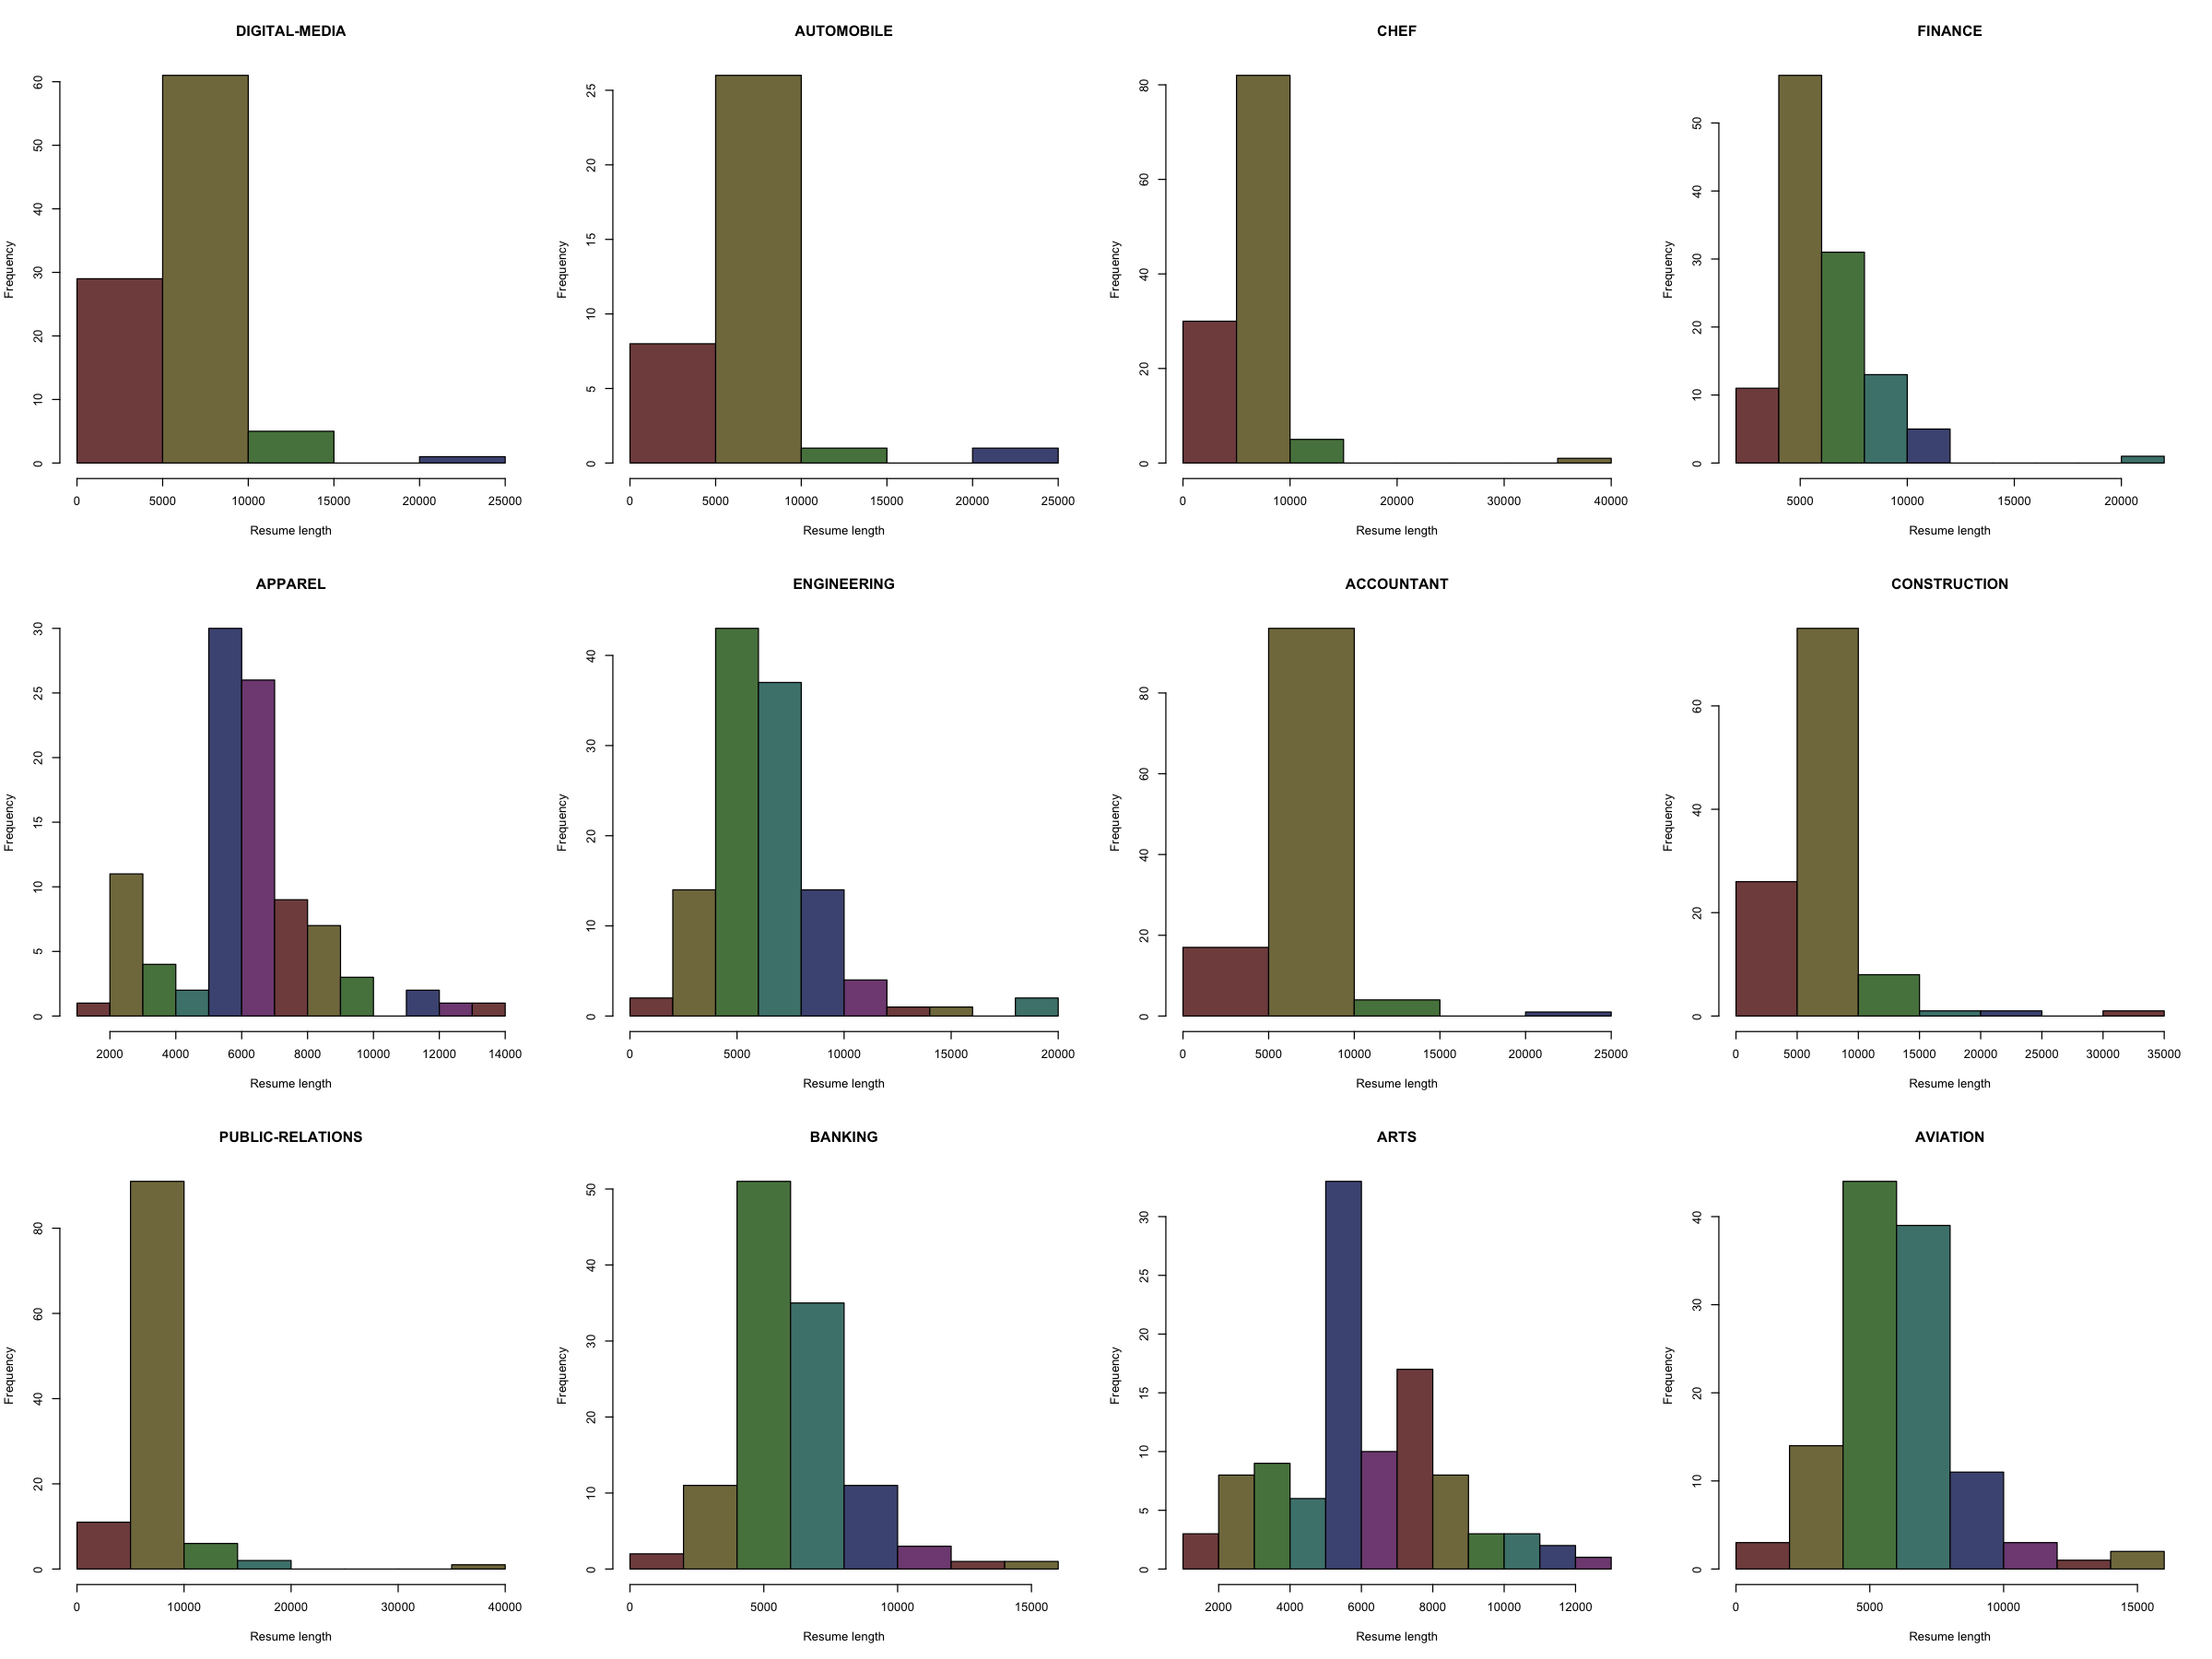

In [109]:
plot.length.distribution(frame, c(3, 4))

In [189]:
get.average.length.stats <- function(frame) {
  categories <- unique(frame$Category)
  lengths <- sapply(categories, function(category) {
    lens <- get.sizes.of.category(frame, category)
    mean(lens)
  })

  data <- data.frame(Category = categories, Length = lengths)
  return(data)
}

plot.average.length <- function(frame) {
  data <- get.average.length.stats(frame)
  values <- data$Length
  labels <- substring(data$Category, 1, 4)

  options(repr.plot.height = 5, repr.plot.width = 17.5)
  par(bg = "white")
  barplot(values, names.arg = labels, main = "Average resume length", col = "#4d5582")
}

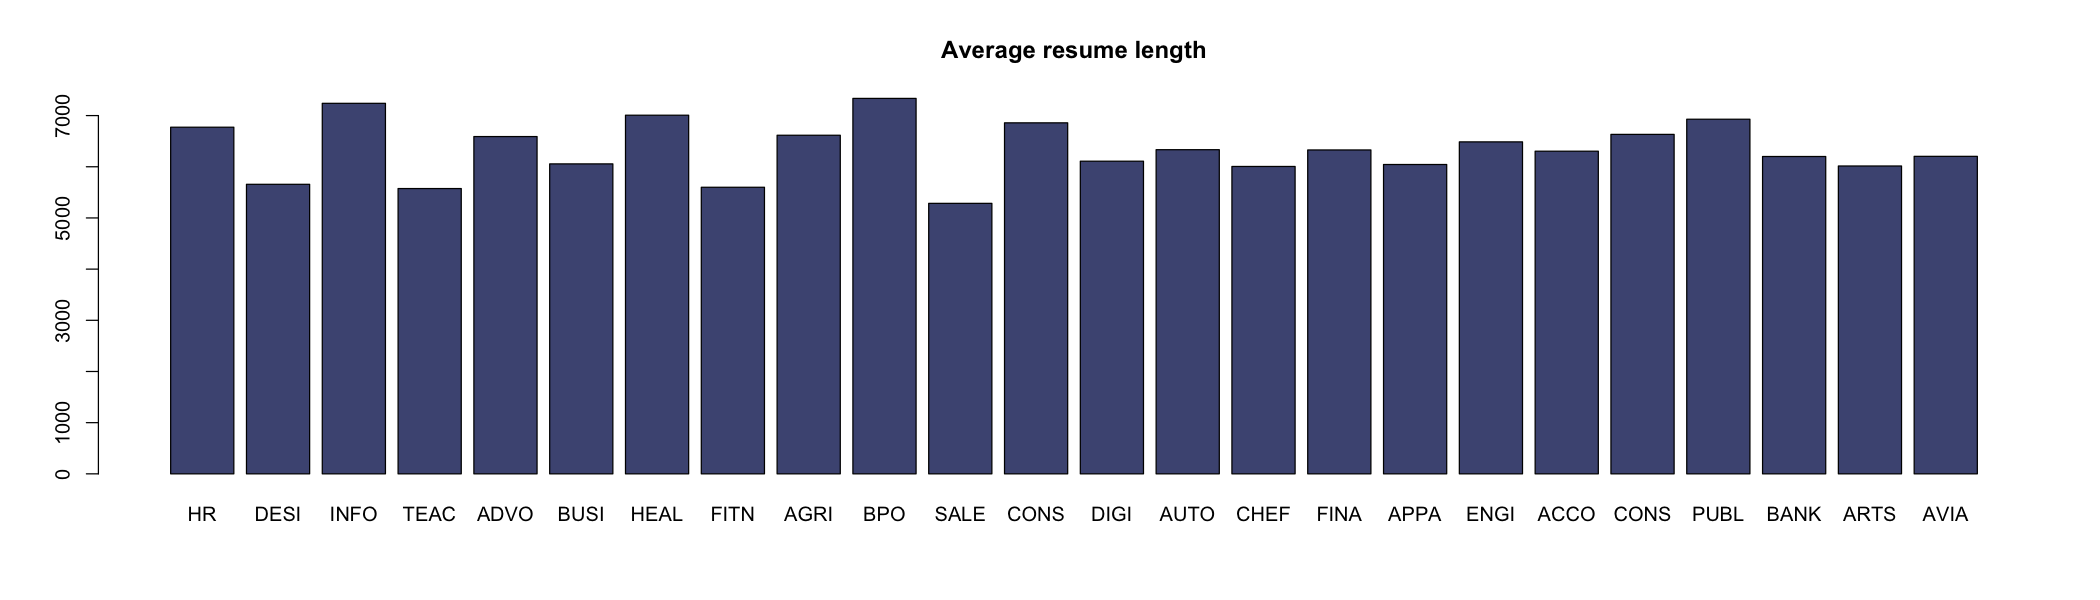

In [190]:
plot.average.length(frame)

In [191]:
length.statistics <- get.average.length.stats(frame)
length.statistics <- length.statistics[order(length.statistics$Length, decreasing = TRUE), ]
length.statistics

,Category,Length
,<chr>,<dbl>
BPO,BPO,7335.727
INFORMATION-TECHNOLOGY,INFORMATION-TECHNOLOGY,7239.550
HEALTHCARE,HEALTHCARE,7007.287
PUBLIC-RELATIONS,PUBLIC-RELATIONS,6928.838
CONSULTANT,CONSULTANT,6858.070
HR,HR,6772.845
CONSTRUCTION,CONSTRUCTION,6632.688
AGRICULTURE,AGRICULTURE,6615.841
ADVOCATE,ADVOCATE,6590.220


In [197]:
shortest.category <- length.statistics$Category[length.statistics$Length == min(length.statistics$Length)]
longest.category <- length.statistics$Category[length.statistics$Length == max(length.statistics$Length)]

print(paste(shortest.category, "is the shortest category"))
print(paste(longest.category, "is the longest category"))

difference <- max(length.statistics$Length) - min(length.statistics$Length)
print(paste("The difference between the longest and the shortest category is", round(difference)))

[1] "SALES is the shortest category"
[1] "BPO is the longest category"
[1] "The difference between the longest and the shortest category is 2051"


In [209]:
pie.average.length <- function(frame) {
  data <- get.average.length.stats(frame)
  values <- data$Length - min(data$Length) + 100
  values <- values ^ 2
  labels <- substring(data$Category, 1, 4)

  options(repr.plot.height = 5, repr.plot.width = 5)
  par(bg = "white")

  pie(values, labels = labels, main = "Average resume length: Pie Chart")
}

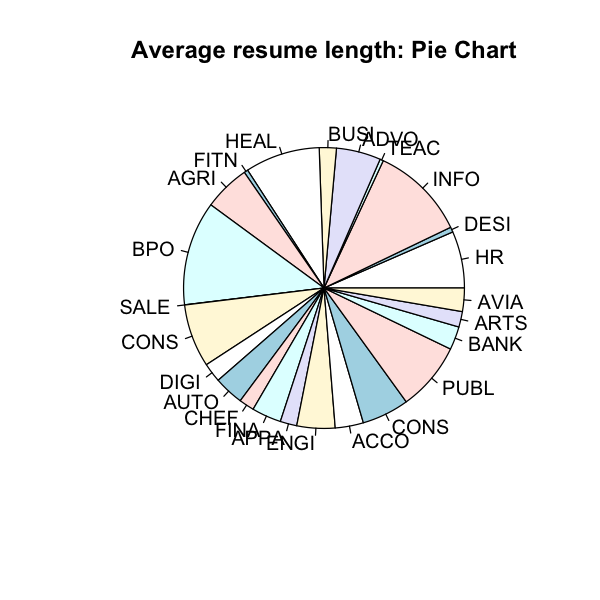

In [210]:
pie.average.length(frame)

### B. Getting popular words by category

In [27]:
library(tokenizers)

get.word.statistics.of.category <- function(frame, category) {
  resumes <- frame[frame$Category == category, "Resume_str"]
  words <- unlist(tokenize_words(resumes, strip_numeric = TRUE))
  frame <- data.frame(table(words))
  names(frame) <- c("Word", "Amount")
  return(frame)
}


In [30]:
get.top.words <- function(statistics, top.limit = 10, length.limit = 4) {
  ordered <- statistics[order(statistics$Amount, decreasing = TRUE), ]
  long <- ordered[nchar(as.character(ordered$Word)) >= length.limit, ]
  top <- long[1:top.limit, ]
  return(top)
}

In [33]:
hr.statistics <- get.word.statistics.of.category(frame, "HR")
hr.top.words <- get.top.words(hr.statistics, top.limit = 15, length.limit = 5)
hr.top.words

,Word,Amount
,<fct>,<int>
3557,management,947
2021,employee,819
1195,company,723
5580,state,665
2871,human,599
6001,training,502
2024,employees,499
5046,resources,416
834,business,390


In [242]:
library(ggplot2)

plot.popular.words.by.category <- function(frame, layout.size = c(3, 4)) {
  options(repr.plot.height = layout.size[1] * 6, repr.plot.width = layout.size[2] * 6)
  par(bg = "white", mfrow = layout.size)
  categories <- unique(frame$Category)

  for (category in categories) {
    statistics <- get.word.statistics.of.category(frame, category)
    top.words <- get.top.words(statistics, top.limit = 10, length.limit = 5)

    pie(
      top.words$Amount, 
      labels = top.words$Word, 
      main = category,
      cex = 2,
    )
  }

}

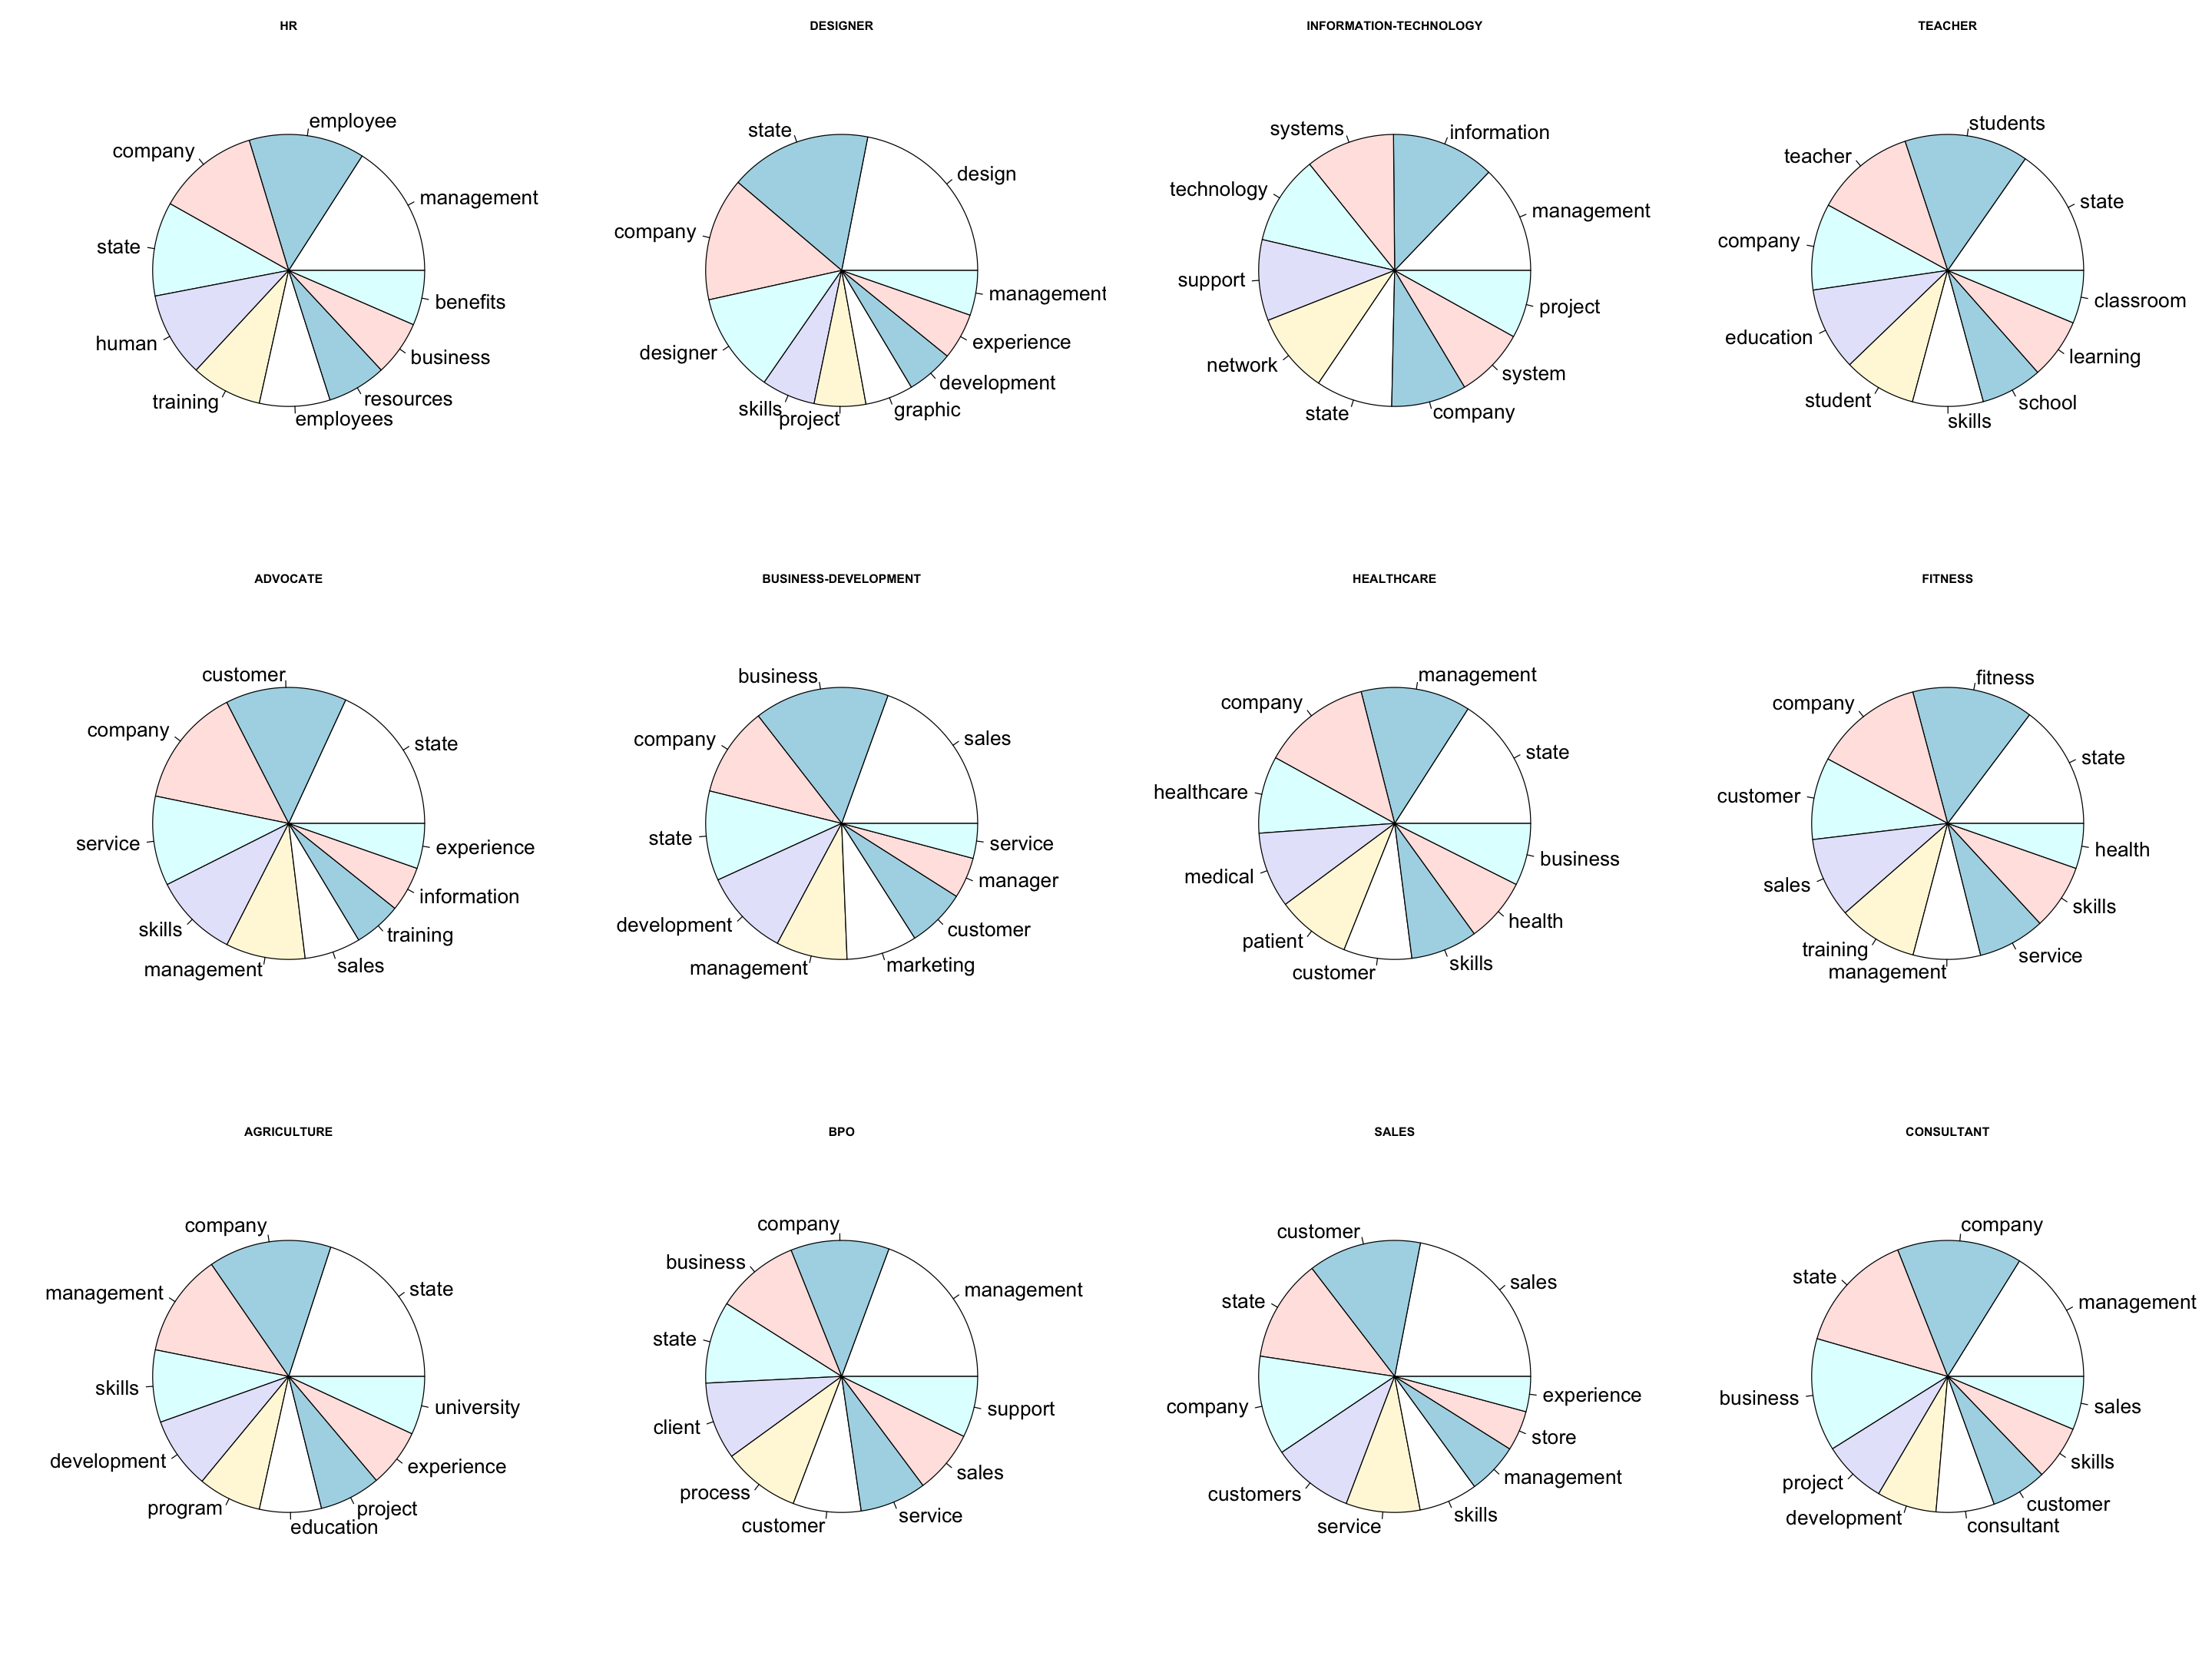

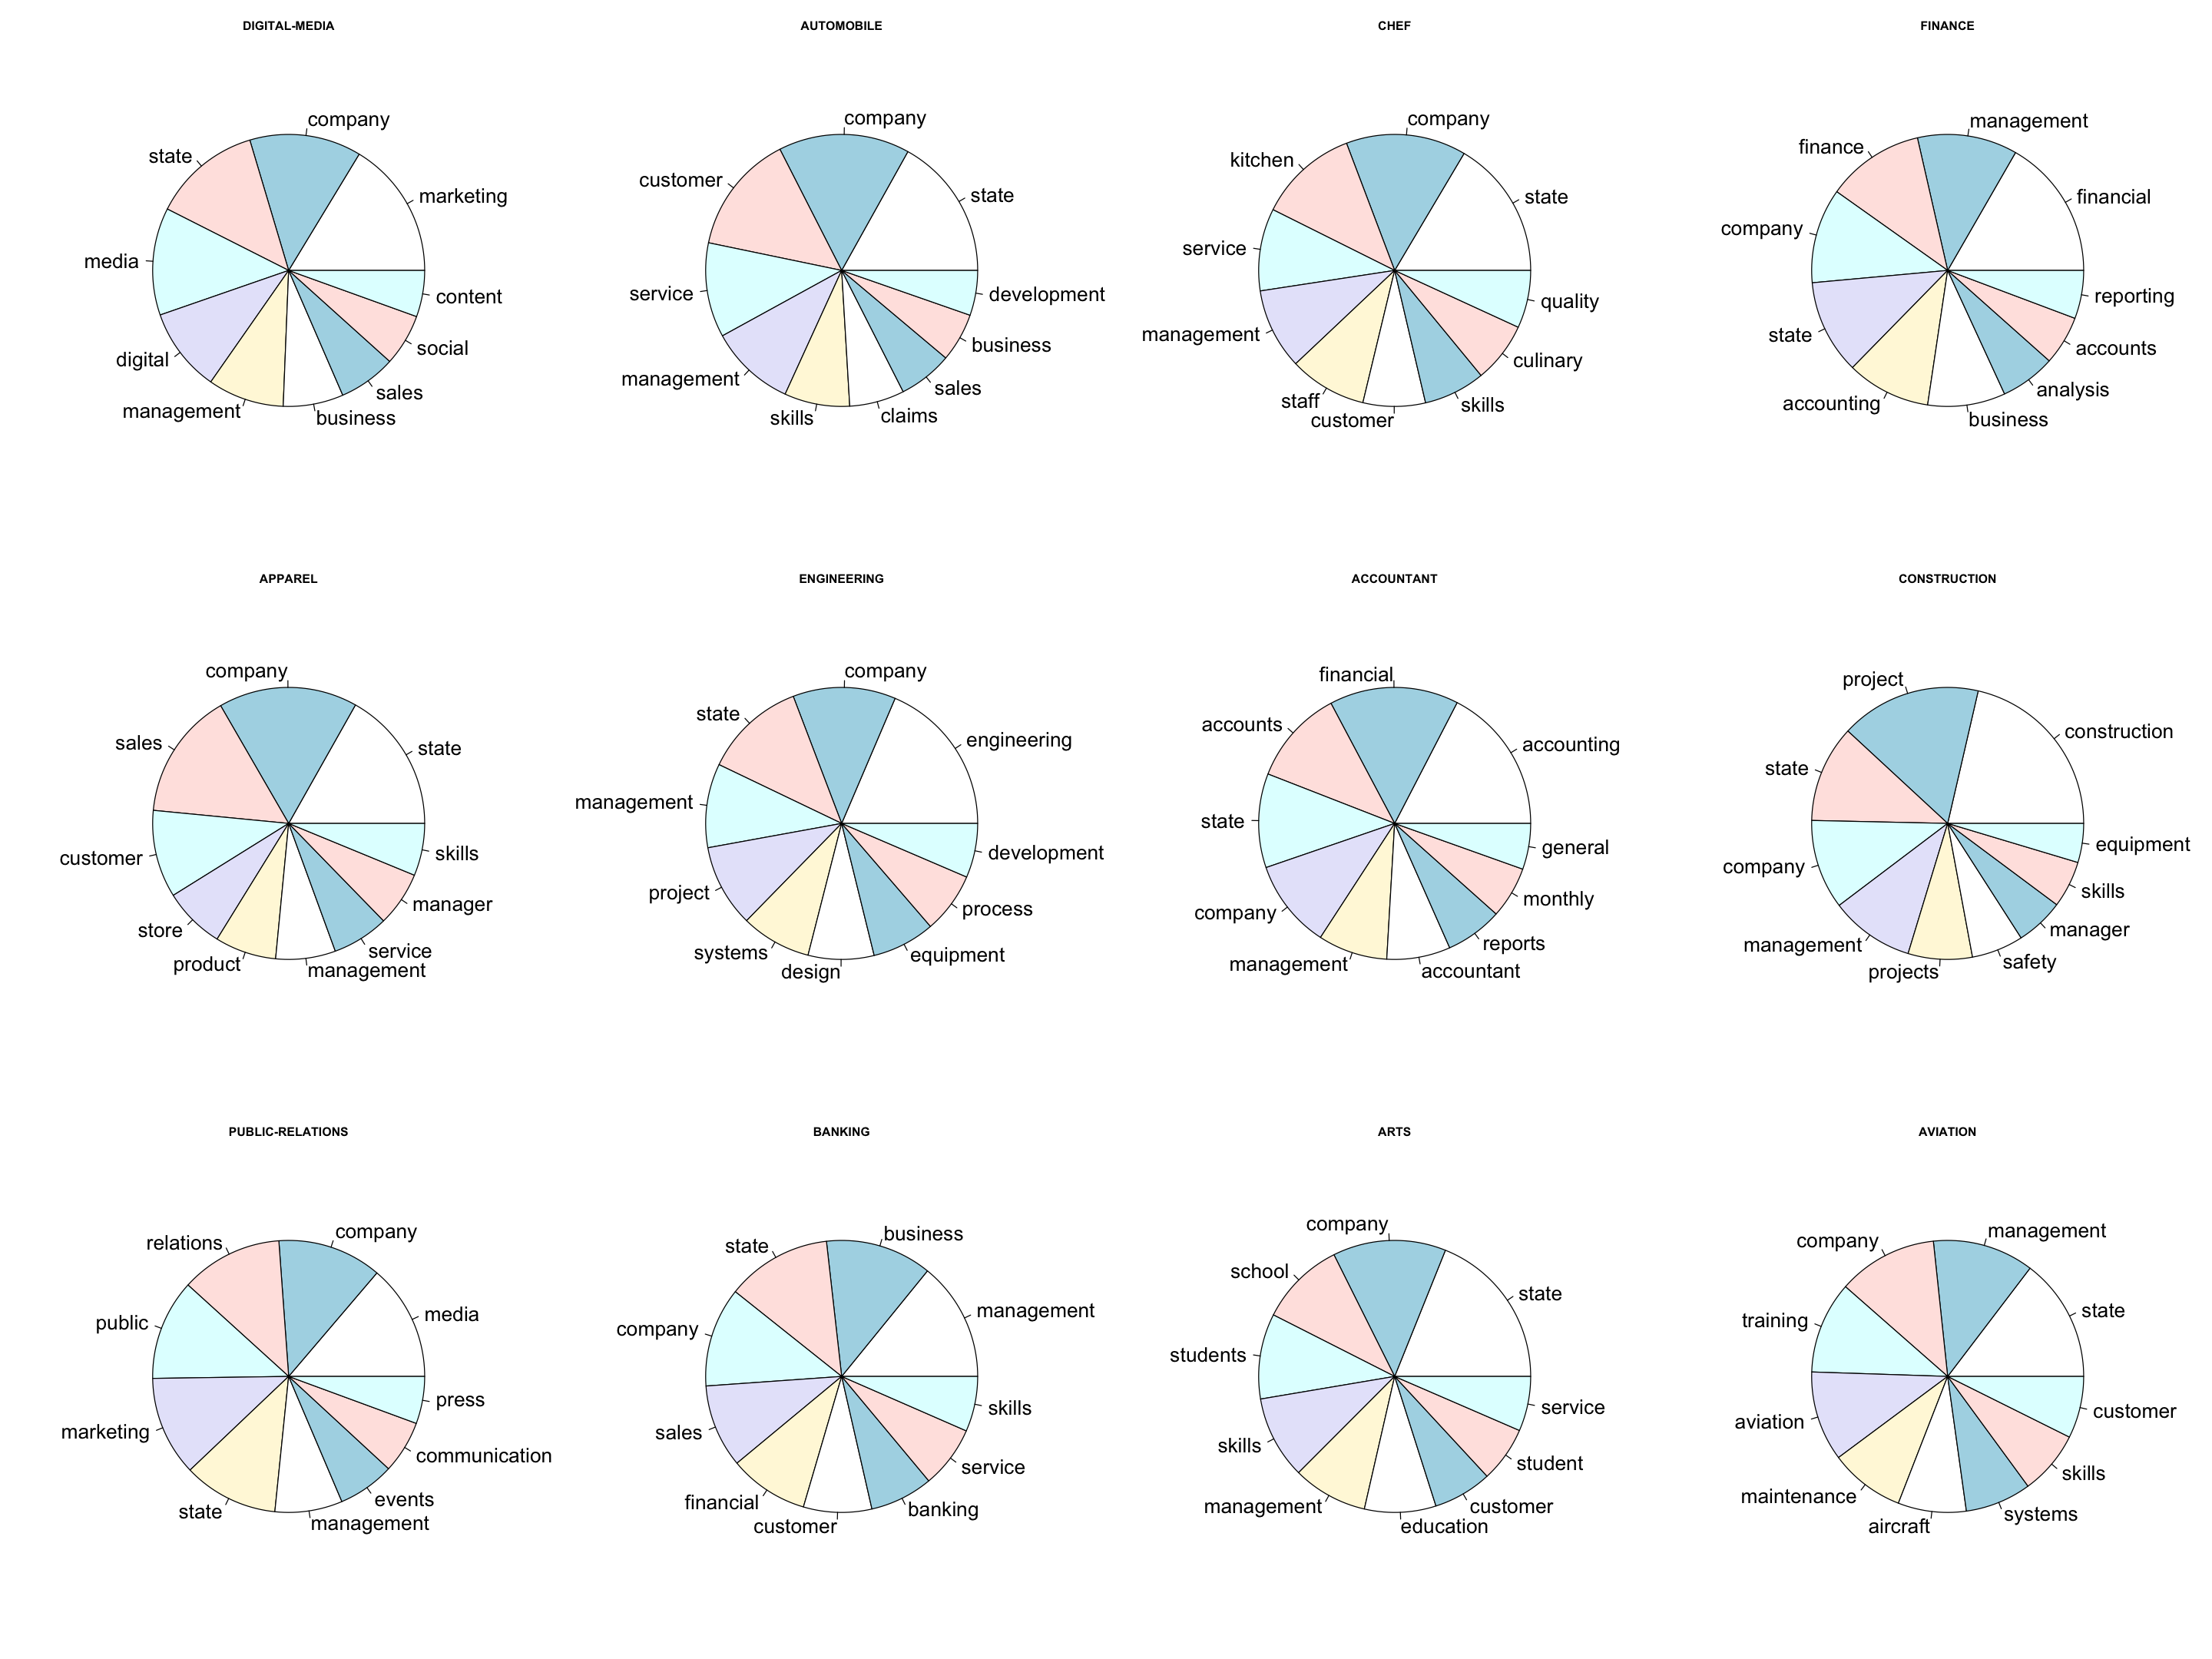

In [243]:
plot.popular.words.by.category(frame)